In [39]:
####################
# Prep 1 basic imports functions/methods
####################
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

import re, string, unicodedata
# import contractions
# import inflect

import matplotlib
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import gc
import nltk
from nltk.corpus import stopwords
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
import os
basepath = "C:/U of A Fort Smith/My BS Science Degree/2025-01 CS4333 Machine Learning/MLFP_DataAnalysis_and_DataPrep Tony/"
# basepath = "R:/2025-01 CS4333 Machine Learning/MLFP_DataAnalysis_and_DataPrep Tony/"

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)
 
def processDF (filename):
    # print (filename)
    fileUse = os.path.join(basepath, filename)
    df = pd.read_csv(fileUse)
    df["Review_text"] = df["Review_text"].astype(str).apply(remove_stop_words)
    df["Review_text"] = df["Review_text"].str.replace("[^a-z^']", " ", regex= True)
    return df

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
    

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#remove all punctuation
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words


def normalize(words):
    words = remove_non_ascii(words)
    #words = to_lowercase(words)
    words = remove_punctuation(words)
    #words = replace_numbers(words)
    return words

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\JoeAtHome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JoeAtHome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
####################
# Prep 2 Prep all dataframes @ 6-8 minutes+
####################
df1 = processDF("data_set_1.csv")
df2 = processDF("data_set_2.csv")
df3 = processDF("data_set_3.csv")
df4 = processDF("data_set_4.csv")

df1.name = "df1"
df2.name = "df2"
df3.name = "df3"
df4.name = "df4"

In [41]:
####################
# Analyze dataframe sizes - if desired
####################
print(f"df1 records: {len(df1):,}")
print(f"df2 records: {len(df2):,}")
print(f"df3 records: {len(df3):,}")
print(f"df4 records: {len(df4):,}")

print(f"df2/df1 records: {(len(df2)/len(df1)):,.3f}")
print(f"df1/df2 records: {(len(df1)/len(df2)):,.3f}")
print(f"df3/df1 records: {(len(df3)/len(df1)):,.3f}")
print(f"df1/df3 records: {(len(df1)/len(df3)):,.3f}")
print(f"df4/df1 records: {(len(df4)/len(df1)):,.3f}")
print(f"df1/df4 records: {(len(df1)/len(df4)):,.3f}")

df1 records: 60,889
df2 records: 505,207
df3 records: 4,915
df4 records: 701,528
df2/df1 records: 8.297
df1/df2 records: 0.121
df3/df1 records: 0.081
df1/df3 records: 12.388
df4/df1 records: 11.521
df1/df4 records: 0.087


In [32]:
 
def confusionMatrixGraph(xgb_model, X_test, y_test, dfToUse_name):
    ###############################
    # Step 5 confusion matrix to analyze accuracy
    ###############################
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    # clf = SVC(kernel = 'linear').fit(x_train,y_train)
    # clf.predict(x_train)
    # y_pred = clf.predict(x_test)
    predictions = xgb_model.predict(X_test)

    # Creates a confusion matrix
    cm = confusion_matrix(y_test, predictions) 
    print ("confusion matrix shape")
    print (cm.shape)
    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                        index = ['0', '1', '2', '3', '4', '5'], 
                        columns = ['0', '1', '2', '3', '4', '5'])

    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True, fmt = 'g', cmap = 'Blues')
    # plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(model.evaluate(X_test, y_test, verbose=False)))
    # plt.title("Training Accuracy: {:.4f}".format(accuracy_trn) + "\n Testing Accuracy:  {:.4f}".format(accuracy_test))
    plt.title("XGBoost " + dfToUse_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
    plt.show()

    # loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
    # print("Training Accuracy: {:.4f}".format(accuracy))
    # loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    # print("Testing Accuracy:  {:.4f}".format(accuracy))
    #score = classifier_svc.score(X_test, y_test)
    #print("Accuracy:", score) #print accuracy of SVM model


In [33]:
# all purpose predictor
def predictor(dfToUse, dfToUse_name, scaleFrac):
    from xgboost import XGBClassifier
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    ###############################
    # Step 1 Resize Dataset
    ###############################

    print(dfToUse.dtypes)
    print("dfToUse_Name: " + dfToUse_name)
    print(f"dfToUse records: {(len(dfToUse)):,}")
    dfToUse.head(3)
    # scaleFrac = scaleData
    dfToUse = dfToUse.sample(frac=scaleFrac)
    print(dfToUse.dtypes)
    print(f"scaleFrac: {scaleFrac:0.5}")
    print(f"dfToUse records (resized): {(len(dfToUse)):,}")
    dfToUse.head(3) # print sample - 1st three

    #create tokenized words and attach as column
    from nltk import word_tokenize

    tokens = [word_tokenize(sen) for sen in dfToUse.Review_text] # create tokens
    dfToUse['tokens'] = tokens # add to df
    dfToUse.head(3) # print sample - 1st three

    ###############################
    # Step 2 define train and test sets
    ###############################
    from sklearn.model_selection import train_test_split

    # sentences = sample['tokens'].values
    sentences = dfToUse['tokens'].str.join(' ') ## join values into string
    y = dfToUse['Rating'].values
    # y = dummy_y

    sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)
    # SGBClassifier requires y targets with 0 index as in 0, 1, 2, 3 4 which the data is actually 1, 2, 3, 4, 5
    # the "from sklearn.preprocessing import LabelEncoder" converst to 0 offset rather than 1
    print("y_train:" )
    print(y_train)

    ytrain_classes = []
    for i in y_train:
        if i not in ytrain_classes:
           ytrain_classes.append(i)
    for i in ytrain_classes:
        print(i)
    y_train = le.fit_transform(y_train)
    print("scikit-learn LabelEncoder result" )
    print(y_train)

    ytrain_classes.clear()
    for i in y_train:
        if i not in ytrain_classes:
           ytrain_classes.append(i)
    for i in ytrain_classes:
        print(i)

    #vectorize the data

    from sklearn.feature_extraction.text import CountVectorizer

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)

    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    ###############################
    # Step 3 train, print results
    ###############################
    #from sklearn.svm import SVC

    from datetime import datetime

    start_time = datetime.now()

    # Instantiate XGBoost model
    #xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model = XGBClassifier(objective="multi:softprob")

    # Train the model
    xgb_model.fit(X_train, y_train)

    #classifier_svc = SVC()
    #classifier_svc.fit(X_train, y_train)

    # 3. Model Evaluation
    y_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")


    # 4. Prediction on New Data

    end_time = datetime.now()
    print (dfToUse_name)
    print('start_time: ',start_time) #print out how long it took for model to train
    print('end_time:   ',end_time) #print out how long it took for model to train
    print('Duration: {}'.format(end_time - start_time)) #print out how long it took for model to train

    ###############################
    # Step 4 accurcy metrics
    ###############################

    from sklearn.metrics import f1_score, precision_score, recall_score
    from sklearn.model_selection import GridSearchCV

    score_test = xgb_model.score(X_test, y_test)
    score_train = xgb_model.score(X_train, y_train)

    print("Training Accuracy:", score_train) #print accuracy of SVM model
    print(f"Training Accuracy: {score_train*100:0.1f}") #print accuracy of SVM model
    print("Testing Accuracy:", score_test) #print accuracy of SVM model
    print(f"Testing Accuracy: {score_test*100:0.1f}") #print accuracy of SVM model

    # classifier_svc.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    precision = precision_score(y_test, y_pred, average=None)
    print(f"Precision: {precision}")
    for i in precision:
        print(f"   Precision: {i*100:0.4f}")
    recall = recall_score(y_test, y_pred, average=None)
    print(f"Recall: {recall}")
    for i in recall:
        print(f"   recall: {i*100:0.4f}")
    F1 = f1_score(y_test, y_pred, average=None)
    print(f"F1: {F1}")
    for i in F1:
        print(f"   Recall: {i*100:0.4f}")

    confusionMatrixGraph(xgb_model, X_test, y_test, dfToUse_name)


# DataSet1 Analysis

Review_text    object
Rating          int64
dtype: object
dfToUse_Name: df1
dfToUse records: 60,889
Review_text    object
Rating          int64
dtype: object
scaleFrac: 0.1
dfToUse records (resized): 6,089
y_train:
[5 2 4 ... 5 4 5]
5
2
4
1
3
scikit-learn LabelEncoder result
[4 1 3 ... 4 3 4]
4
1
3
0
2
Mean Squared Error: 1.825344714379514
df1
start_time:  2025-04-21 20:38:55.147853
end_time:    2025-04-21 20:38:58.733506
Duration: 0:00:03.585653
Training Accuracy: 0.7814279456855016
Training Accuracy: 78.1
Testing Accuracy: 0.18975705843729482
Testing Accuracy: 19.0
Precision: [0.         0.33333333 0.04761905 0.1641791  0.21311475 0.        ]
   Precision: 0.0000
   Precision: 33.3333
   Precision: 4.7619
   Precision: 16.4179
   Precision: 21.3115
   Precision: 0.0000
Recall: [0.         0.0375     0.01886792 0.2037037  0.79268293 0.        ]
   recall: 0.0000
   recall: 3.7500
   recall: 1.8868
   recall: 20.3704
   recall: 79.2683
   recall: 0.0000
F1: [0.         0.06741573 0.027

c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


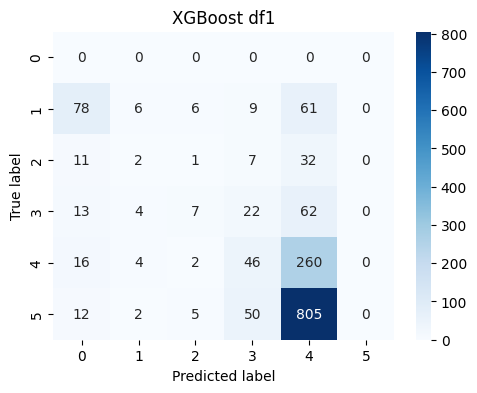

In [34]:
# predictor(dfToUse, dfToUse_name, scaleFrac)
predictor(df1, "df1", .1)

# DataSet2 Analysis

Review_text    object
Rating          int64
dtype: object
dfToUse_Name: df2
dfToUse records: 505,207
Review_text    object
Rating          int64
dtype: object
scaleFrac: 0.01
dfToUse records (resized): 5,052
y_train:
[5 5 5 ... 5 5 5]
5
4
3
2
1
scikit-learn LabelEncoder result
[4 4 4 ... 4 4 4]
4
3
2
1
0
Mean Squared Error: 1.278701504354711
df2
start_time:  2025-04-21 20:39:23.783417
end_time:    2025-04-21 20:39:27.032884
Duration: 0:00:03.249467
Training Accuracy: 0.8770124043283188
Training Accuracy: 87.7
Testing Accuracy: 0.13064133016627077
Testing Accuracy: 13.1
Precision: [0.         0.33333333 0.1875     0.20833333 0.12659303 0.        ]
   Precision: 0.0000
   Precision: 33.3333
   Precision: 18.7500
   Precision: 20.8333
   Precision: 12.6593
   Precision: 0.0000
Recall: [0.         0.08333333 0.09677419 0.125      0.86627907 0.        ]
   recall: 0.0000
   recall: 8.3333
   recall: 9.6774
   recall: 12.5000
   recall: 86.6279
   recall: 0.0000
F1: [0.         0.13333333 0.

c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


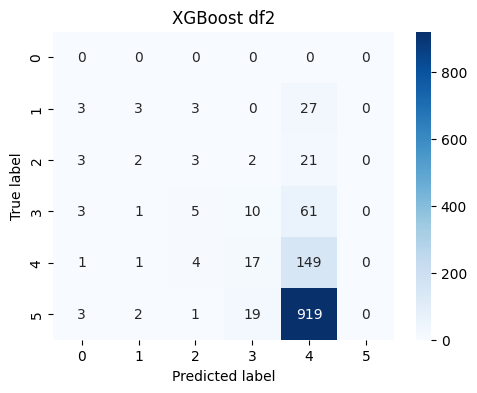

In [35]:
# predictor(dfToUse, dfToUse_name, scaleFrac)
predictor(df2, "df2", .01)

# DataSet3 Analysis

Review_text     object
Rating         float64
dtype: object
dfToUse_Name: df3
dfToUse records: 4,915
Review_text     object
Rating         float64
dtype: object
scaleFrac: 1.0
dfToUse records (resized): 4,915
y_train:
[4. 5. 5. ... 5. 5. 5.]
4.0
5.0
3.0
1.0
2.0
scikit-learn LabelEncoder result
[3 4 4 ... 4 4 4]
3
4
2
0
1
Mean Squared Error: 1.3458096013018714
df3
start_time:  2025-04-21 20:40:25.936142
end_time:    2025-04-21 20:40:29.502471
Duration: 0:00:03.566329
Training Accuracy: 0.9338035811177429
Training Accuracy: 93.4
Testing Accuracy: 0.10170870626525631
Testing Accuracy: 10.2
Precision: [0.         0.         0.         0.06666667 0.10630942 0.        ]
   Precision: 0.0000
   Precision: 0.0000
   Precision: 0.0000
   Precision: 6.6667
   Precision: 10.6309
   Precision: 0.0000
Recall: [0.         0.         0.         0.07692308 0.91111111 0.        ]
   recall: 0.0000
   recall: 0.0000
   recall: 0.0000
   recall: 7.6923
   recall: 91.1111
   recall: 0.0000
F1: [0.        

c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


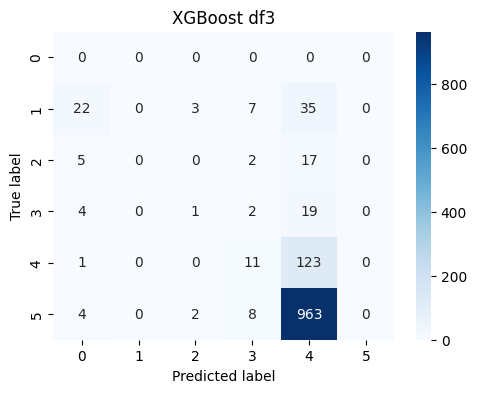

In [37]:
# predictor(dfToUse, dfToUse_name, scaleFrac)
predictor(df3, "df3", 1.0)

# DataSet4 Analysis

Review_text    object
Rating          int64
dtype: object
dfToUse_Name: df4
dfToUse records: 701,528
Review_text    object
Rating          int64
dtype: object
scaleFrac: 0.01
dfToUse records (resized): 7,015
y_train:
[1 1 5 ... 3 5 4]
1
5
4
2
3
scikit-learn LabelEncoder result
[0 0 4 ... 2 4 3]
0
4
3
1
2
Mean Squared Error: 2.090079817559863
df4
start_time:  2025-04-21 20:40:56.666105
end_time:    2025-04-21 20:41:00.906222
Duration: 0:00:04.240117
Training Accuracy: 0.8146740163467021
Training Accuracy: 81.5
Testing Accuracy: 0.10718358038768529
Testing Accuracy: 10.7
Precision: [0.         0.28571429 0.14705882 0.15909091 0.11509817 0.        ]
   Precision: 0.0000
   Precision: 28.5714
   Precision: 14.7059
   Precision: 15.9091
   Precision: 11.5098
   Precision: 0.0000
Recall: [0.         0.02352941 0.04807692 0.05       0.82926829 0.        ]
   recall: 0.0000
   recall: 2.3529
   recall: 4.8077
   recall: 5.0000
   recall: 82.9268
   recall: 0.0000
F1: [0.         0.04347826 0.0

c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JoeAtHome\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


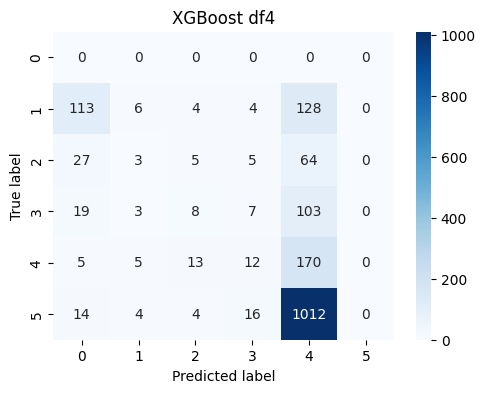

In [38]:
# predictor(dfToUse, dfToUse_name, scaleFrac)
predictor(df4, "df4", .01)
